In [19]:
# Plot the 3C template waveforms recorded at all stations

In [20]:
## Import modules
from matplotlib import pyplot as plt
from matplotlib import ticker
from obspy import read, UTCDateTime
from utils_snuffler import read_normal_markers
from utils_preproc import read_and_process_windowed_waveforms
from utils_cc import get_timewin_from_template_name
from os.path import join

In [21]:
## Inputs
root = "/Volumes/OmanData/geophones_no_prefilt/data"
tempname = "SiblingA12-17-23-35"
phase = "X"

freqmin = 10
freqmax = 450

begin = -0.01
end = 0.2

ymax = 4000.0

In [22]:
## Read the snuffler pick files
timewin = get_timewin_from_template_name(tempname)
pickdf = read_normal_markers(join(root, timewin, f"{phase.lower()}picks_{tempname}.dat"))

In [23]:
## Read and process the waveform
stream = read_and_process_windowed_waveforms(pickdf, freqmin, freqmax, begin=begin, end=end, reference="common")

A04
A05
A03
A02
A06
A01


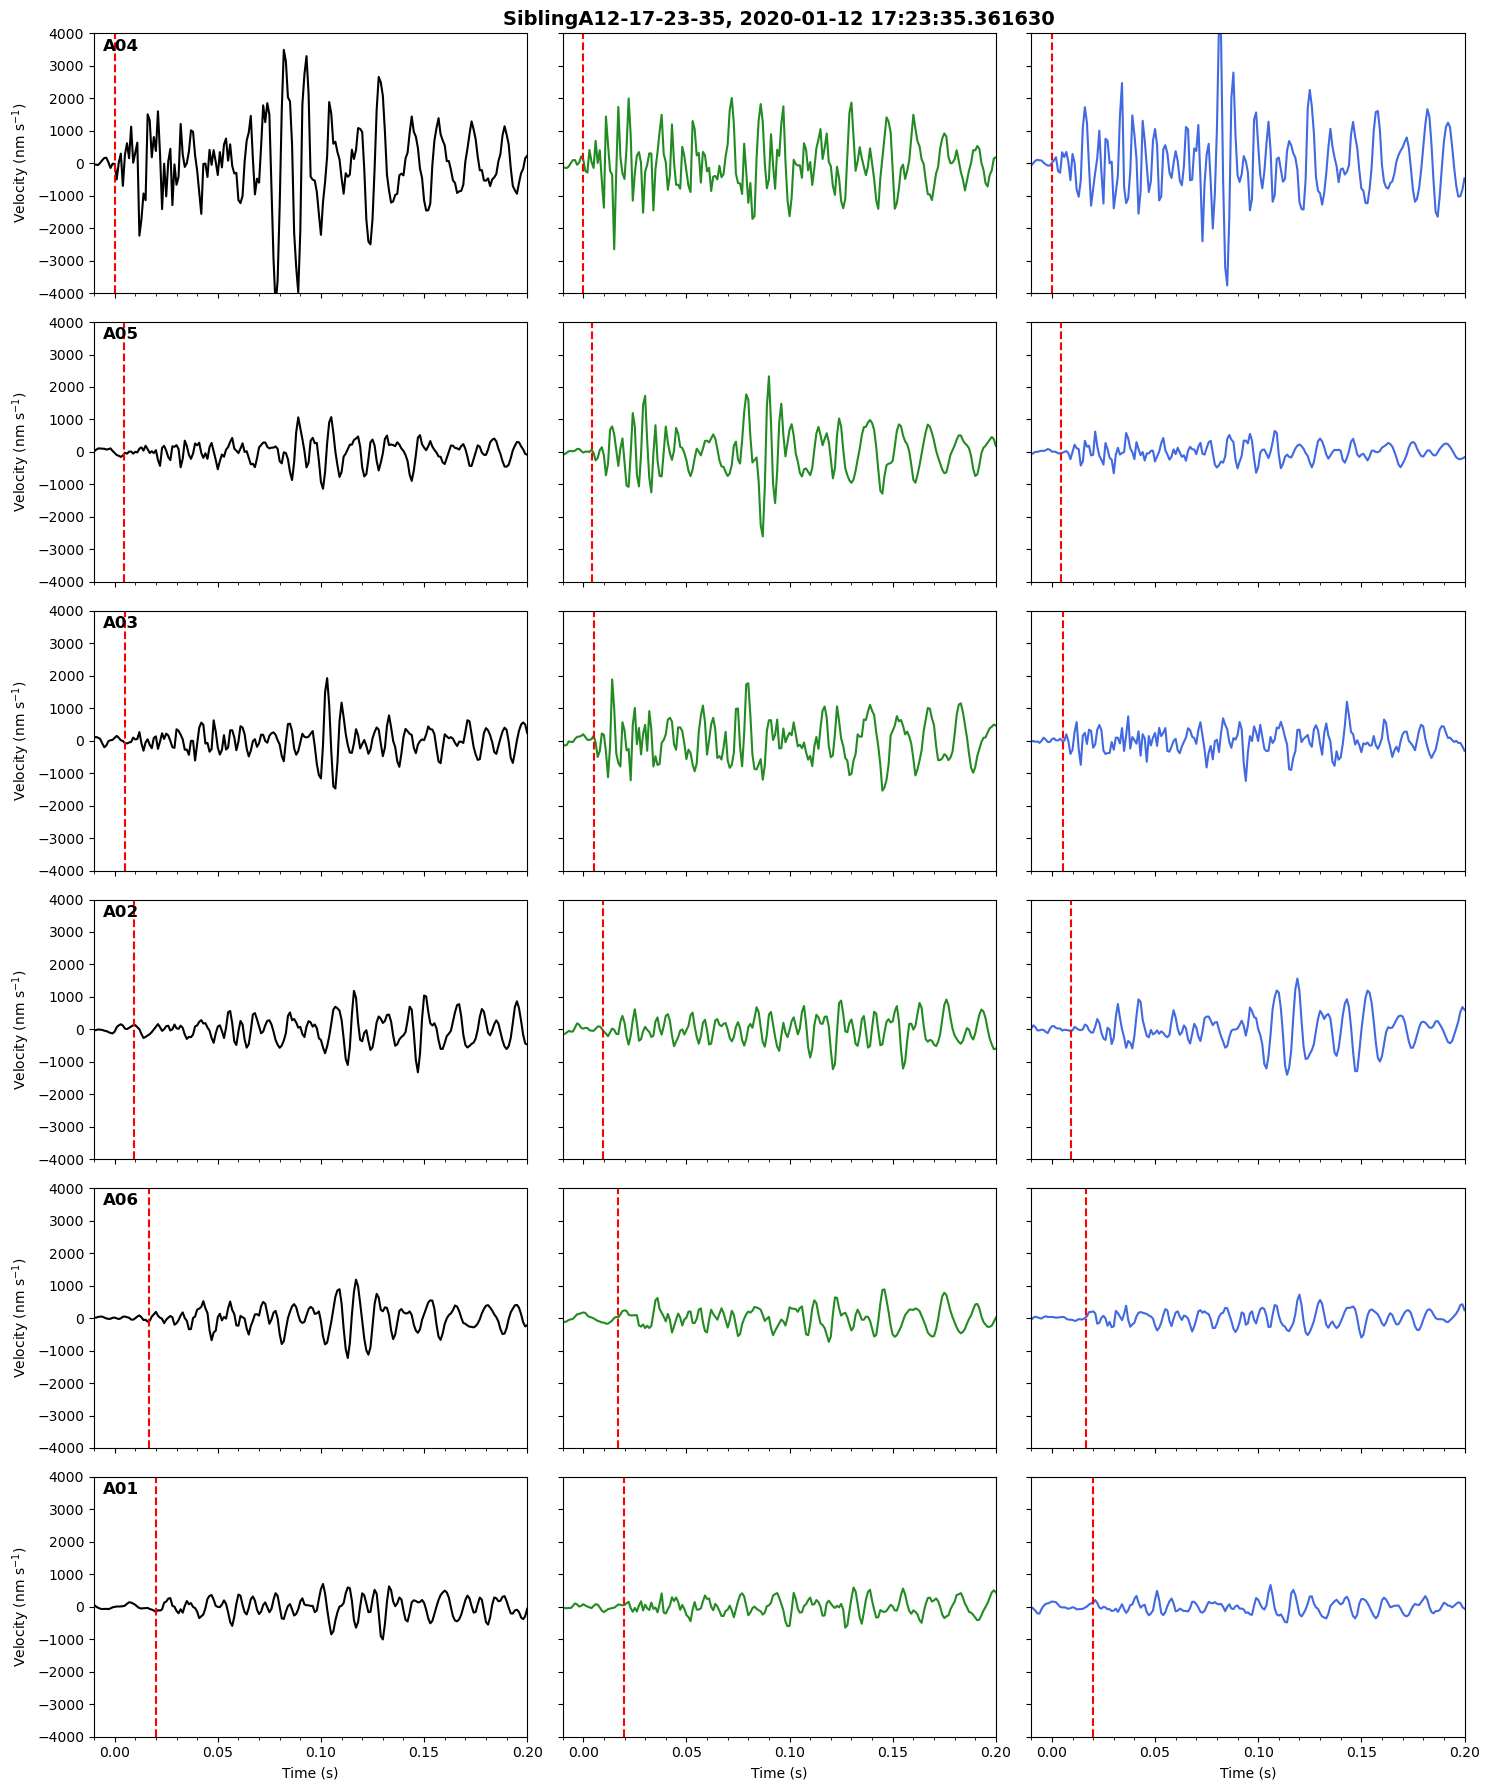

In [24]:
## Plot the waveforms for each station
stations = pickdf["station"].tolist()
numst = len(stations)

fig, axes = plt.subplots(nrows=numst, ncols=3, sharex=True, sharey=True, figsize=(15, numst*3))
starttime0 = UTCDateTime(pickdf["time"].min())

for i, row in pickdf.iterrows():
    station = row["station"]
    starttime = UTCDateTime(row["time"])

    trace_z = stream.select(station=station, channel="*Z")[0]
    trace_1 = stream.select(station=station, channel="*1")[0]
    trace_2 = stream.select(station=station, channel="*2")[0]

    data_z = trace_z.data
    data_1 = trace_1.data
    data_2 = trace_2.data

    timeax = trace_z.times()+begin

    axes[i, 0].plot(timeax, data_z, "black")
    axes[i, 1].plot(timeax, data_1, "forestgreen")
    axes[i, 2].plot(timeax, data_2, "royalblue")

    ### Annotate the axes
    axes[i, 0].text(0.02, 0.98, f"{station}", transform=axes[i, 0].transAxes, horizontalalignment="left", verticalalignment="top", fontsize=12, fontweight="bold")

    ### Plot the P wave pick
    axes[i, 0].axvline(starttime-starttime0, color="r", linestyle="--")
    axes[i, 1].axvline(starttime-starttime0, color="r", linestyle="--")
    axes[i, 2].axvline(starttime-starttime0, color="r", linestyle="--")
    
    ### Set the axes attributes
    axes[i, 0].set_xlim(begin, end)
    axes[i, 0].set_ylim(-ymax, ymax)

    axes[i, 1].set_xlim(begin, end)
    axes[i, 1].set_ylim(-ymax, ymax)

    axes[i, 2].set_xlim(begin, end)
    axes[i, 2].set_ylim(-ymax, ymax)

    axes[i, 0].xaxis.set_major_locator(ticker.MultipleLocator(0.05))
    axes[i, 1].xaxis.set_major_locator(ticker.MultipleLocator(0.05))
    axes[i, 2].xaxis.set_major_locator(ticker.MultipleLocator(0.05))

    axes[i, 0].xaxis.set_minor_locator(ticker.MultipleLocator(0.01))
    axes[i, 1].xaxis.set_minor_locator(ticker.MultipleLocator(0.01))
    axes[i, 2].xaxis.set_minor_locator(ticker.MultipleLocator(0.01))


    axes[i, 0].set_ylabel("Velocity (nm s$^{-1}$)")

    if i == 0:
        timestr = starttime0.strftime("%Y-%m-%d %H:%M:%S.%f")
        axes[i, 1].set_title(f"{tempname}, {timestr}", fontsize=14, fontweight="bold")


axes[numst-1, 0].set_xlabel("Time (s)")
axes[numst-1, 1].set_xlabel("Time (s)")
axes[numst-1, 2].set_xlabel("Time (s)")

## Save the figure
fig.tight_layout()

if freqmax is None:
    suffix = f"highpass{freqmin:.0f}hz"
else:
    suffix  = f"bandpass{freqmin:.0f}-{freqmax:.0f}hz"

filename = f"template_waveforms_{tempname}_{suffix}.png"
outpath = join(root, timewin, filename)
fig.savefig(outpath, dpi=300, transparent=True)

print(f"Figure saved to {outpath}")